# Problem 8

In [13]:
import numpy as np
from sklearn.naive_bayes import GaussianNB as NB
from sklearn.metrics import accuracy_score as ACC
import matplotlib.pyplot as plt
import copy
import mnist_reader as mnist
import operator

# load mnist

In [10]:
DATA_SET_PATH = "mnist/"
train_imgs , train_labels = mnist.load_mnist(DATA_SET_PATH , kind = 'train')
test_imgs , test_labels = mnist.load_mnist(DATA_SET_PATH , kind = 't10k')

image path mnist/train-images-idx3-ubyte.gz
image path mnist/t10k-images-idx3-ubyte.gz


In [11]:
data = np.concatenate((train_imgs , test_imgs) , axis = 0)

# standard form
data = data.T
train_imgs = train_imgs.T
test_imgs = test_imgs.T

# Forward Selection

In [43]:
class ForwardSelection():
    def __init__(self):
        pass
    def fit(self , X  , y , Xt , yt , n_featuers):
        '''
            X columns represent an instance of data
            X rows represent features
        '''
        self.mask = [False for i in range(X.shape[0])]
        
        res = {}
        for i in range(n_featuers):
            resi = {}
            
            for j  , maskj in enumerate(self.mask):
                
                if maskj is not False :
                    continue
                    
                self.mask[j] = True
                Xj = X[self.mask , :]
                Xtj = Xt[self.mask , :]
                
                
                #train and test clssifer
                clf = NB()
                clf.fit(Xj.T , y)
                predj = clf.predict(Xtj.T)
                accj = ACC(predj , yt)
                
                
                resi[j] = accj
                
                self.mask[j] = False
                
            #get max acc from res
            selected_idx = max(resi.items(), key=operator.itemgetter(1))[0]
            
            #update mask
            self.mask[selected_idx] = True
            
            #update res
            res[i + 1] = resi[selected_idx]
            
            plt.plot(list(res.keys()) , list(res.values()))
            plt.title("forward selection")
            plt.xlabel("features selected")
            plt.ylabel("acc")
            plt.show()
            
        return res
    
    def transform(self , X):
        return x[self.mask , :]
        

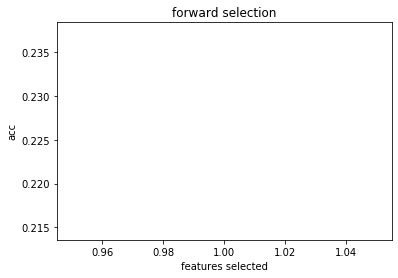

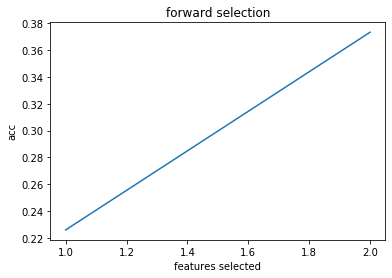

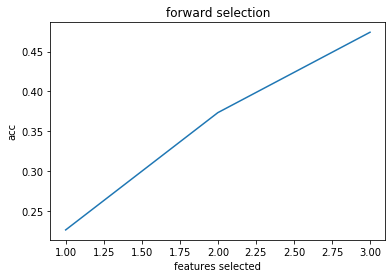

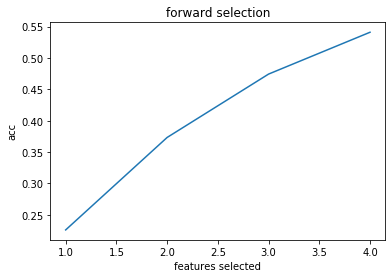

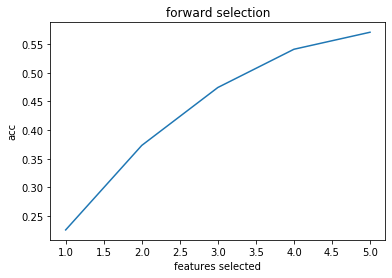

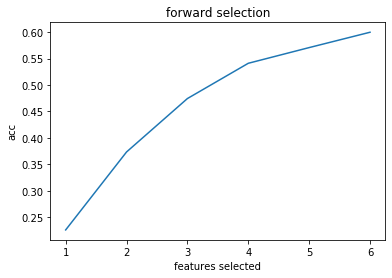

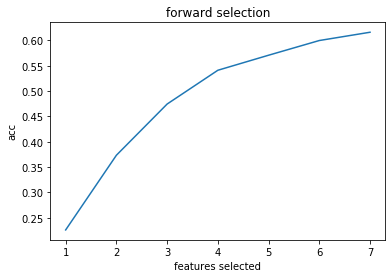

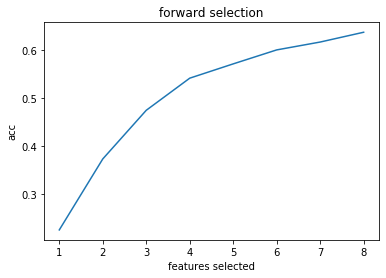

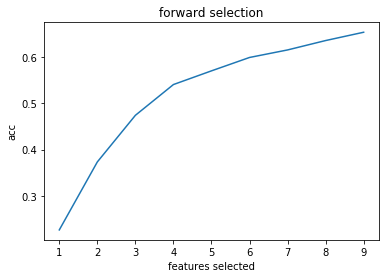

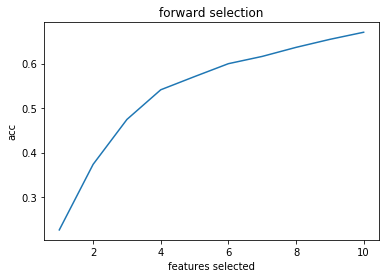

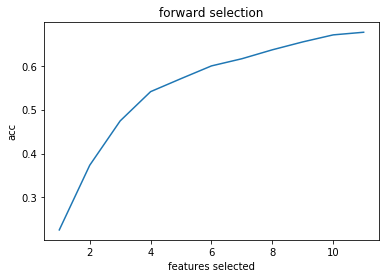

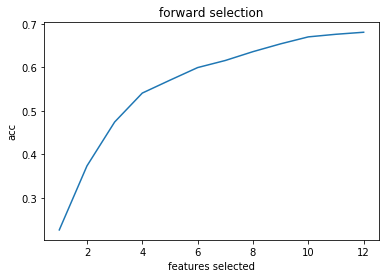

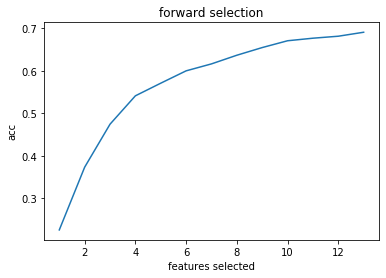

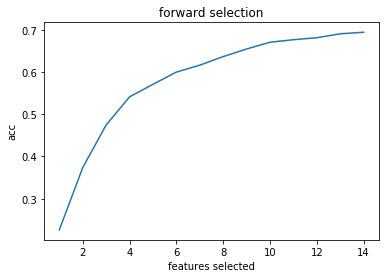

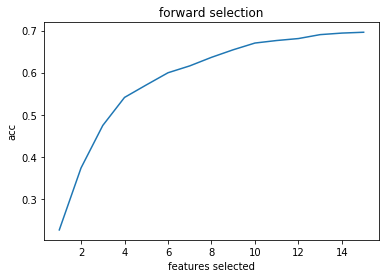

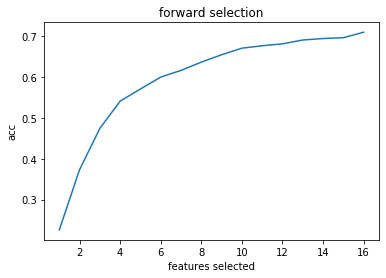

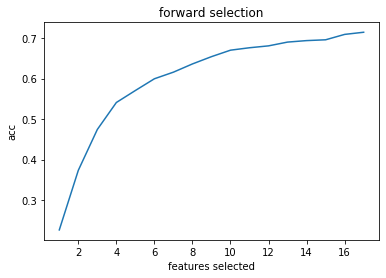

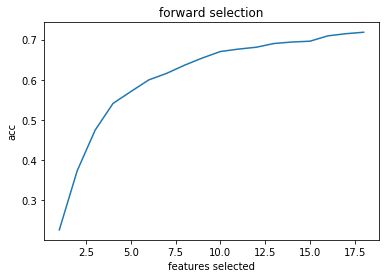

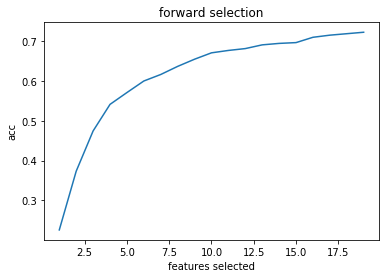

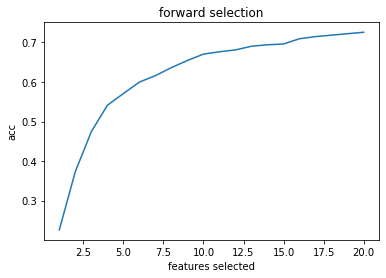

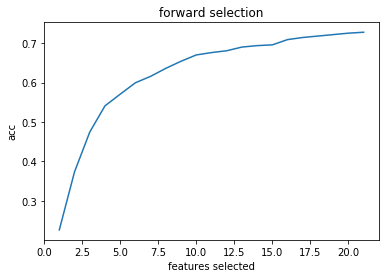

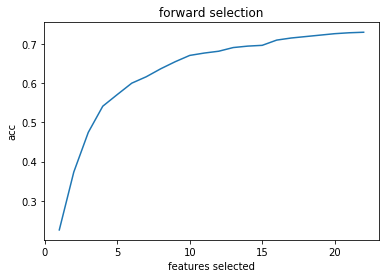

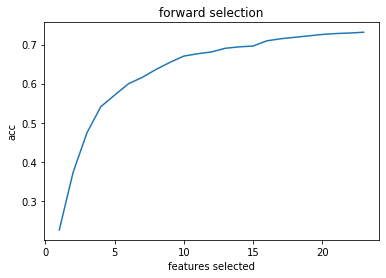

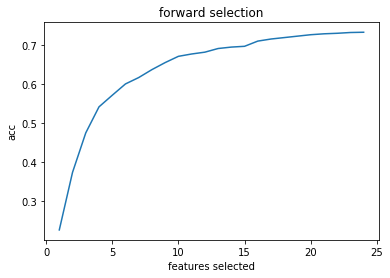

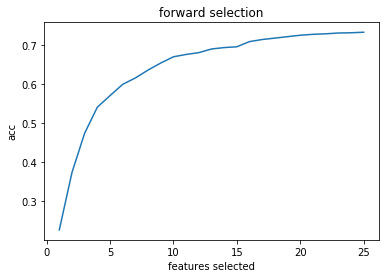

In [44]:
selector = ForwardSelection()
res = selector.fit(train_imgs , train_labels , test_imgs , test_labels , 25)

Text(0, 0.5, 'acc')

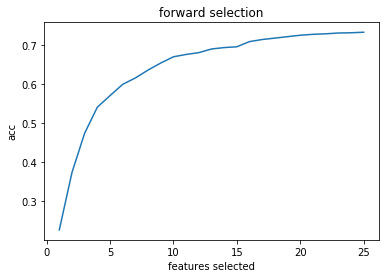

In [45]:
plt.plot(list(res.keys()) , list(res.values()))
plt.title("forward selection")
plt.xlabel("features selected")
plt.ylabel("acc")